<a href="https://colab.research.google.com/github/Sunnygomes/Sunnygomes/blob/main/researchonpeach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform
import splitfolders
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import splitfolders

In [5]:
splitfolders.ratio("/content/drive/MyDrive/Peach_Research/Peach/train", # The location of dataset
                   output="/content/drive/MyDrive/Peach_Research/output/", # The output location
                   seed=42, # The number of seed
                   ratio=(.9, .05, .05), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this
                   )

Copying files: 7217 files [03:47, 31.67 files/s]


In [6]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_dataset = train_datagen.flow_from_directory("/content/drive/MyDrive/Peach_Research/output/train",
target_size=(200, 200),
color_mode='grayscale',
class_mode='categorical',
batch_size=100,
)
test_dataset = test_datagen.flow_from_directory("/content/drive/MyDrive/Peach_Research/output/test",
target_size=(200, 200),
class_mode='categorical',
color_mode='grayscale',
batch_size=100,
shuffle=False
)
valid_dataset = valid_datagen.flow_from_directory("/content/drive/MyDrive/Peach_Research/output/val",
target_size=(200, 200),
class_mode='categorical',
batch_size=100,
color_mode='grayscale',
)


Found 6494 images belonging to 2 classes.
Found 363 images belonging to 2 classes.
Found 360 images belonging to 2 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=train_dataset.image_shape))
model.add(MaxPool2D(2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

Epoch 1/3
65/65 [==============================] - 423s 6s/step - loss: 0.5835 - accuracy: 0.7016 - precision: 0.7016 - recall: 0.7016 - val_loss: 0.3609 - val_accuracy: 0.8333 - val_precision: 0.8333 - val_recall: 0.8333
Epoch 2/3
65/65 [==============================] - 406s 6s/step - loss: 0.3303 - accuracy: 0.8648 - precision: 0.8648 - recall: 0.8648 - val_loss: 0.3100 - val_accuracy: 0.8611 - val_precision: 0.8611 - val_recall: 0.8611
Epoch 3/3
65/65 [==============================] - 408s 6s/step - loss: 0.2719 - accuracy: 0.8922 - precision: 0.8922 - recall: 0.8922 - val_loss: 0.2470 - val_accuracy: 0.9167 - val_precision: 0.9167 - val_recall: 0.9167


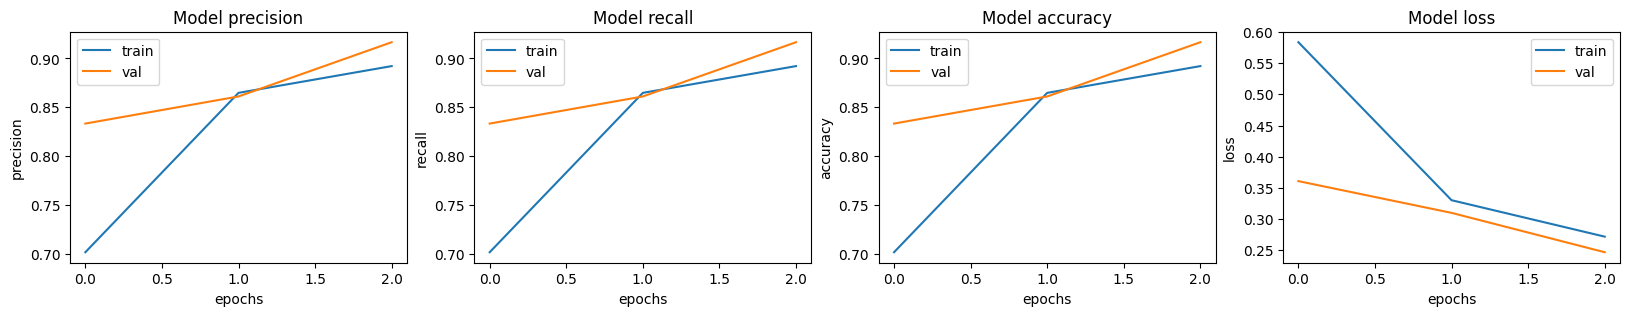

In [9]:
METRICS = [
'accuracy',
keras.metrics.Precision(name='precision'),
keras.metrics.Recall(name='recall')
]
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

Info = model.fit(
train_dataset,
validation_data=valid_dataset,
epochs=3,
)

fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()
for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
  ax[i].plot(Info.history[met])
  ax[i].plot(Info.history['val_' + met])
  ax[i].set_title('Model {}'.format(met))
  ax[i].set_xlabel('epochs')
  ax[i].set_ylabel(met)
  ax[i].legend(['train', 'val'])

In [10]:
predictions = model.predict(test_dataset)

4/4 [==============================] - 7s 1s/step


Accuracy: 0.928374655647383
Precision: 0.931738683127572
Recall: 0.9128787878787878
F1_score: 0.9209865380751456


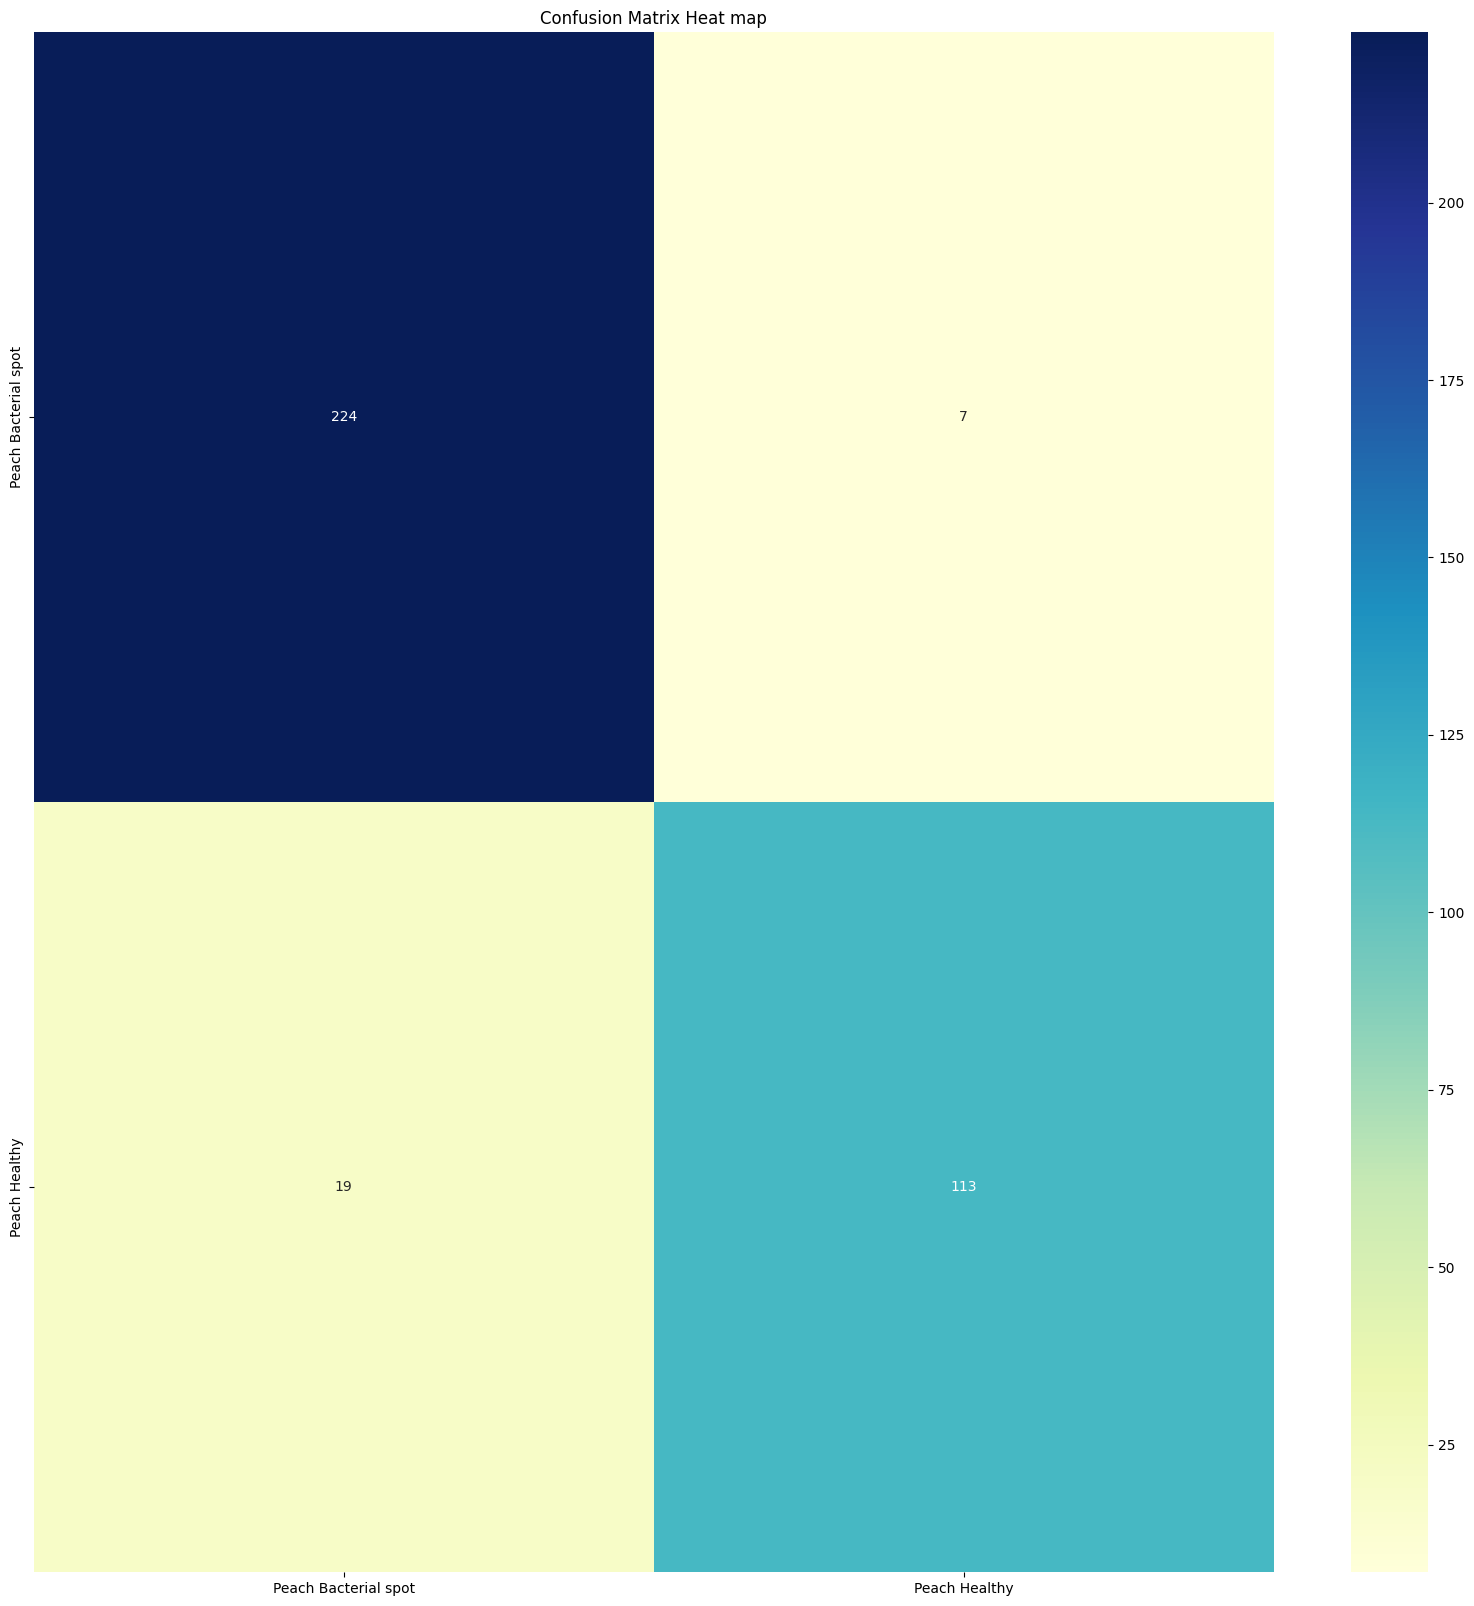

In [11]:
diseases_labels = []

for key, value in train_dataset.class_indices.items():
  diseases_labels.append(key)

def evaluate(actual, predictions):
  pre = []
  for i in predictions:
    pre.append(np.argmax(i))
  accuracy = (pre == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')
  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, pre, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(20,20))
  conf_mat = confusion_matrix(actual, pre)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=diseases_labels, yticklabels=diseases_labels).set_title('Confusion Matrix Heat map')
  plt.show()

evaluate(test_dataset.classes,predictions)